# Sentiment Analysis Using TF-IDF and Logistic Regression

This notebook performs sentiment analysis on a dataset of customer reviews. The workflow includes preprocessing, modeling, and evaluating the sentiment analysis model.

In [6]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset
Replace `'dataset.csv'` with the path to your actual dataset.

In [7]:
# Load dataset
data = pd.read_csv('dataset.csv')  # Adjust file path if needed
print(data.head())

                                       review_text sentiment
0              This product is amazing! I love it.  positive
1        Terrible experience. Would not recommend.  negative
2               Pretty decent, but has some flaws.   neutral
3  Absolutely fantastic! Exceeded my expectations.  positive
4          Horrible product. Total waste of money.  negative


## Preprocess the Data
Clean the text by removing punctuation, converting to lowercase, and removing stopwords.

In [8]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

data['cleaned_reviews'] = data['review_text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utakarsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Split the Data
Divide the dataset into training and testing sets.

In [9]:
# Splitting data
X = data['cleaned_reviews']
y = data['sentiment']  # Assuming 'sentiment' is the column with labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## TF-IDF Vectorization
Convert the text data into numerical vectors using TF-IDF.

In [10]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## Train Logistic Regression Model

In [11]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

## Evaluate the Model
Use classification metrics and a confusion matrix to evaluate the model.

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         1
    positive       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



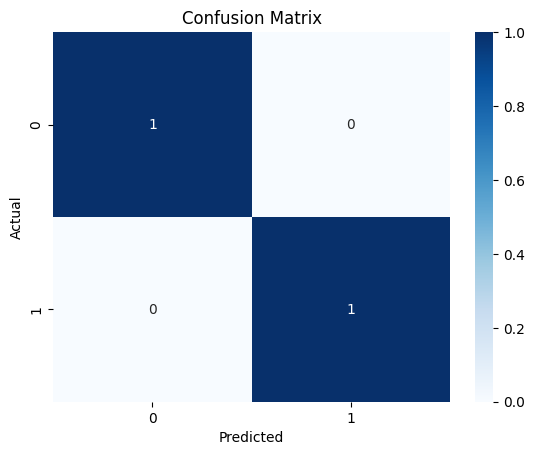

In [12]:
# Evaluation
y_pred = model.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Visualize Significant Words (Optional)

In [13]:
# Visualize most significant words
feature_names = np.array(tfidf.get_feature_names_out())
coefficients = model.coef_[0]
top_positive = np.argsort(coefficients)[-10:]
top_negative = np.argsort(coefficients)[:10]

print("Top positive words:", feature_names[top_positive])
print("Top negative words:", feature_names[top_negative])

Top positive words: ['waste' 'horrible' 'money' 'customer' 'rude' 'awful' 'total'
 'disappointing' 'price' 'worth']
Top negative words: ['amazing' 'satisfied' 'quality' 'love' 'decent' 'pretty' 'flaws' 'great'
 'bad' 'either']
